# Blind Tastings

#### Imports


In [1]:
#Importing libraries and modules used

import pandas as pd
import ds_fun as ds

import acquire as a
import prepare as p
import explore as e
import modeling as m

#### Acquire

Two csv files were downloaded from https://data.world/food/wine-quality, one for red wine and another for white wine, then joined them together into a single dataframe totaling 6497 rows and 13 columns.  The data is from 2009.  Each row represents a distinct bottle and each column is a feature of that bottle.

In [2]:
#Importing data from local drive using function from acquire module
df = a.pour_wine()

- - -
#### Prepare
Alcohol, density, chlorides, and volatile acidity
The data was clean prior to acquisition with no null values, outliers were left in for initial exloration and modeling.  Split into three dataframes for train, validate and test


In [3]:
# performing train, val, test, split
train, val, test = p.train_validate(df)

- - -
#### Explore

Do either of these qualities have a relationship with quality scores? 

Performed stats tests on various features to check for correlation with quality.  Alcohol, density, chlorides, and volatile acidity have the strongest correlations in the chart below with their greater distance from the zero(red) line

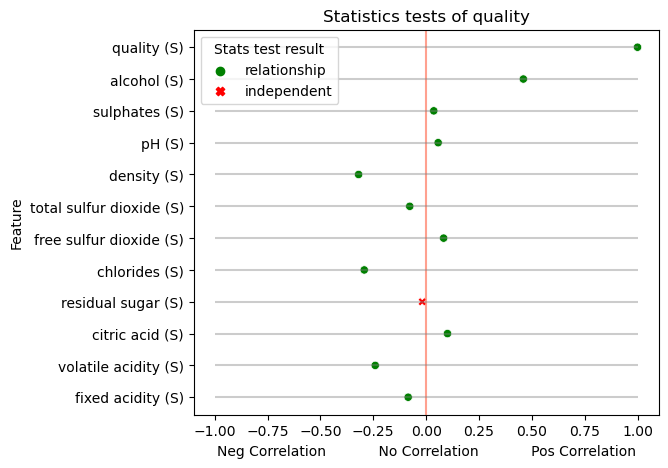

In [4]:
#function for performing pearsonr or spearman test where appropriate and plots results

e.correlation_test(train, 'quality')

In [10]:
#scaling continuos variables to prepare for clustering

cont_columns = ['alcohol' ,'sulphates' , 'pH' , 'density', 'total sulfur dioxide' , 'free sulfur dioxide' , 'chlorides' , 'residual sugar' , 'citric acid' , 'volatile acidity' , 'fixed acidity']
train_scaled, val_scaled, test_scaled = m.scale_cont_columns(train, val, test, cont_columns, scaler_model = 1)

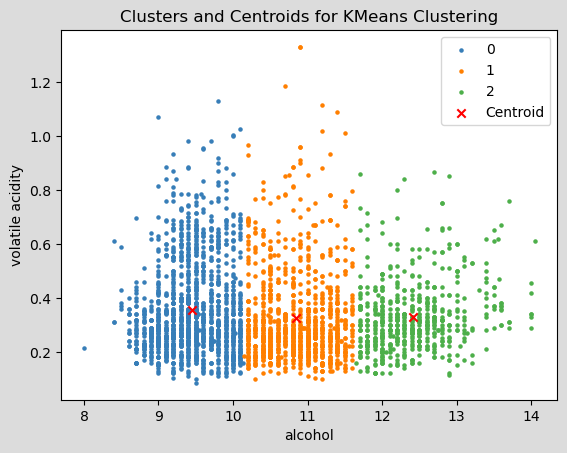

In [9]:
#calling function from explore module

e.display_clusters(train, ['alcohol' , 'volatile acidity'])

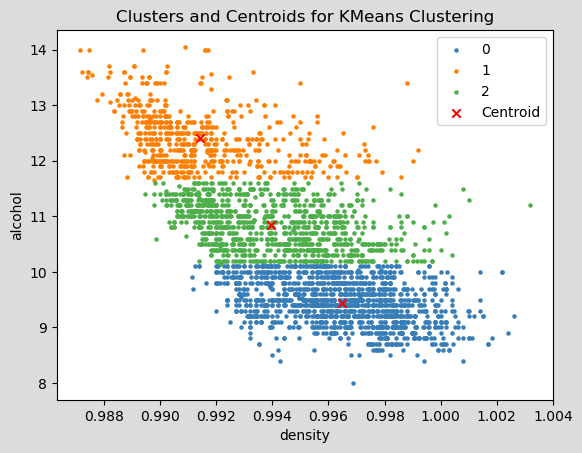

In [8]:
#calling function from explore module

e.display_clusters(train, ['density' , 'alcohol'])

- - -
#### Exploration Summary

Four features were found to be drivers of quality: alcohol, density, chlorides, and volatile acidity.  These features were used for modeling.

- - -
#### Modeling



Models with clusters did not perform as well as models withouth them so all clusters were excluded from final model.

In [13]:
#isolationg the target variable ('quality')
X_train, y_train, X_val, y_val, X_test, y_test = m.train_val_test(train, val, test, 'quality')

In [14]:
m.find_regression_baseline(y_train)

Using RMSE Mean training baseline: 0.8640


0.8640415848996251




(Introduction
Explain how you will be evaluating your models
Include the evaluation metric you will be using and why you have chosen it
Create a baseline and briefly explain how it was calculated
If you use code to generate your baseline run the code and generate the output here
Printout should read:
Baseline: "number" "evaluation metric")








(Best 3 Models

Show the three best model results obtained using your selected features to predict the target variable
Typically students will show the top models they are able to generate for three different model types
You may use this as a template for how to introduce your models:
Model Type
Code that runs the best model in that model type goes here 
(This may be imported from a module)

Printout of model code should read:
"Model Type"
"evaluation metric" on train: "evaluation result"
"evaluation metric" on validate: "evaluation result"
)

- - -
#### Test Model






(Choose the best model out of the three as you best model and explain why you have chosen it
Explain that you will now run your final model on test data to gauge how it will perform on unseen data
Code that runs the best overall model on test data (this may be imported from a module)
Printout of model code should read:
"Model Type"
"evaluation metric" on Test: "evaluation result"
)

- - -
#### Modeling Wrap




(
Give a final interpretation of how the models test score compares to the baseline and weather you would recommend this model for production
Conclusion
)

- - -
#### Summary




(
Summarize your findings and answer the questions you brought up in explore
Summarize how drivers discovered lead or did not lead to a successful model
)

- - -
#### Recommendations





(
Recommendations are actions the stakeholder should take based on your insights
)

- - -
#### Next Steps





(
Next Steps are what you, as a Data Scientist, would do if provided more time to work on the project

Where there is code in your report there should also be code comments telling the reader what each code block is doing. This is true for any and all code blocks even if you are using a function to import code from a module.



**Your Notebook should contain adequate markdown that documents your thought process, decision making, and navigation through the pipeline. As a Data Scientist, your job does not end with making data discoveries. It includes effectively communicating those discoveries as well. This means documentation is a critical part of your job.**)